## *santoshhulbutti@gmail.com | DataTrained | Evaluation Project # 07

## Customer Churn Analysis

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)

import statsmodels.api as sm

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

#logistic Regression
from sklearn.linear_model import LogisticRegression

# Ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#C-Support Vector Classification
from sklearn.svm import SVC

# naive bayes model
from sklearn.naive_bayes import GaussianNB

# Classifiction metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc


# from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [2]:
data_url = "https://raw.githubusercontent.com/santoshhulbutti/-DataTrained_Evaluation_Projects/main/Customer%20Churn%20Analysis/Telecom_customer_churn.csv"

data0 = pd.read_csv(data_url)

<h1 align="center"><font color = "red">Data Preprocessing Visualization & EDA</font> </h1>

<h2><font color = "blue">01. Initial data analysis</font></h2>

In [3]:
data0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data0.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
129,2639-UGMAZ,Male,1,No,No,71,No,No phone service,DSL,Yes,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,56.45,3985.35,No
4690,7036-ZZKBD,Male,0,Yes,No,31,Yes,No,DSL,No,No,Yes,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),66.40,2019.8,No
1328,6475-VHUIZ,Female,0,Yes,No,23,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,54.25,1221.55,No
3201,4717-GHADL,Female,0,No,No,50,Yes,Yes,DSL,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Mailed check,79.60,4024.2,No
2956,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No


In [5]:
data0.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data0.shape

(7043, 21)

In [7]:
unique_null_data = pd.DataFrame(list(zip(data0.nunique(), data0.isnull().sum(), data0.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=data0.columns)
unique_null_data

,unique_entries,missing values,Dtypes
customerID,7043,0,object
gender,2,0,object
SeniorCitizen,2,0,int64
Partner,2,0,object
Dependents,2,0,object
tenure,73,0,int64
PhoneService,2,0,object
MultipleLines,3,0,object
InternetService,3,0,object
OnlineSecurity,3,0,object


In [8]:
data0.duplicated().sum()

0

In [9]:
data0.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [10]:
data0[data0['TotalCharges']==' '].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

### Observation:
1. The data set has 7043 rows of data & 21 Columns.
    1. there are 2 integer type of feature and one of them is categorical in nature.
    2. 18 eatures of object datatype consisting ordinal & nominal categories.
    3. Churn feature(Traget variable) is also object datatype. here it is nominal data type.
2. No Duplicate entries.
4. Feature engineering is required for some columns.
5. TotalCharges is formatted as Object dtype. we will convert it to float type.
6. TotalCharges has total 11 missing entries.

<h2><font color = "blue">02. Updating Proper Dtypes...</font></h2>

In [11]:
missing = data0[data0['TotalCharges']==' '].index.to_list()

In [12]:
missing

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [13]:
for i in missing:
    data0.loc[i, 'TotalCharges'] = np.nan

In [14]:
data0[data0['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### converting TotalCharges into Float type & SeniorCitizen into object dtype

In [15]:
data0['TotalCharges'] = pd.to_numeric(data0['TotalCharges'])

In [16]:
Sen_Citi_dict ={0:'No', 1: 'Yes'}
data0['SeniorCitizen'] = data0['SeniorCitizen'].map(Sen_Citi_dict)

<h2><font color = "blue">03. Descriptive statistics...</font></h2>

In [17]:
#Descriptive statistics
data0.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,2,No,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Descriptive statistics
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


### Observation:
1. We see no missing observation from count. every feature has 7043 number of entries.
2. there are some entries/observations where the minimum value of features was 0.0.

<h2><font color = "blue">04. Dropping Columns & Grouping numerical & categorical features..</font></h2>

In [19]:
#dropping 'customerID'
data0.drop(columns = ['customerID'], inplace=True)

In [20]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
# cat_cols = []
# for column in data0.columns:
#     if column in num_cols:
#         pass
#     else:
#         cat_cols.append(column)

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

<h2><font color = "blue">05. Checking entries with ZERO Value...</font></h2>

In [21]:
data0[data0 == 0].count()#*100/data0.shape[0]

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

### Observation:
1. tenure has 11 entries as 0. it means these are new customers
2. missing entries in TotalCharges are imputed as 0. these will be replaced using mean/median/some other methods.

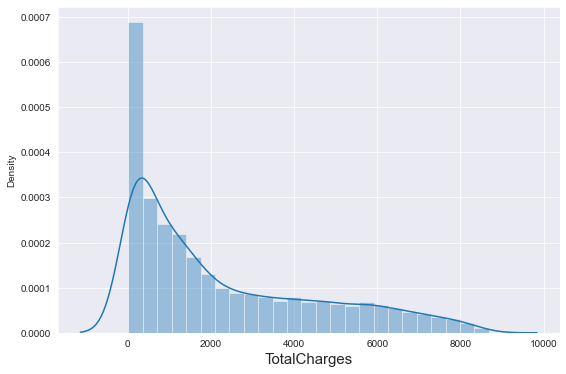

In [22]:
plt.figure(figsize=(9,6))
sns.distplot(data0['TotalCharges']);
plt.xlabel('TotalCharges',fontsize=15)
plt.show()

In [23]:
data0['TotalCharges'] = data0['TotalCharges'].fillna(data0['TotalCharges'].mean())

In [24]:
data0.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
data0.duplicated().sum()

22

In [28]:
data0.drop_duplicates(keep='last',inplace= True)

In [29]:
data1 =data0.copy()

In [31]:
data1.reset_index(drop=True, inplace=True)
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7017,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7018,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7019,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Numerical features :
- tenure
- MonthlyCharges
- TotalCharges

### Categorical features :
- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod
- Churn

In [32]:
data1_num = data1[num_cols]
data1_cat = data1[cat_cols]

<h2><font color = "blue">06. Univariate Analysis...</font></h2>

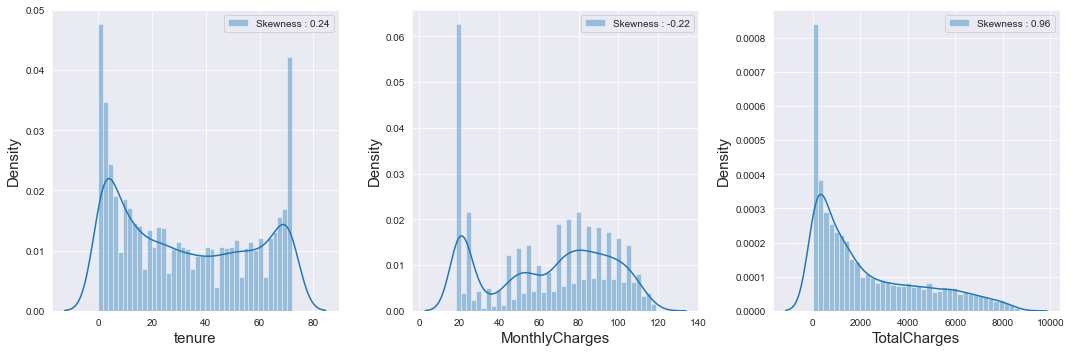

In [40]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(15,5))
for column in data1_num.columns:
    plt.subplot(1,3,i+1)
    sns.distplot(data1_num[column], bins=40, label="Skewness : %.2f"%(data1_num[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=15)
    plt.ylabel('Density',fontsize=15)
    i+=1
    
plt.tight_layout()

### Observation:
1. There seems some outliers in tenure column.
2. MonthlyCharges is normally distributed if consideration of lower values neglected.
3. Total Charges is right skewed due to presence of 0 entries

In [41]:
#To count distinct/unique values in the categorical features
for column in data1_cat:
    print(' ')
    print('----  ' + column + '  ----')
    x = data1_cat[column].value_counts()
    print(x)
    print('#'*50)

 
----  gender  ----
Male      3541
Female    3480
Name: gender, dtype: int64
##################################################
 
----  SeniorCitizen  ----
No     5880
Yes    1141
Name: SeniorCitizen, dtype: int64
##################################################
 
----  Partner  ----
No     3619
Yes    3402
Name: Partner, dtype: int64
##################################################
 
----  Dependents  ----
No     4911
Yes    2110
Name: Dependents, dtype: int64
##################################################
 
----  PhoneService  ----
Yes    6339
No      682
Name: PhoneService, dtype: int64
##################################################
 
----  MultipleLines  ----
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
##################################################
 
----  InternetService  ----
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
#############################

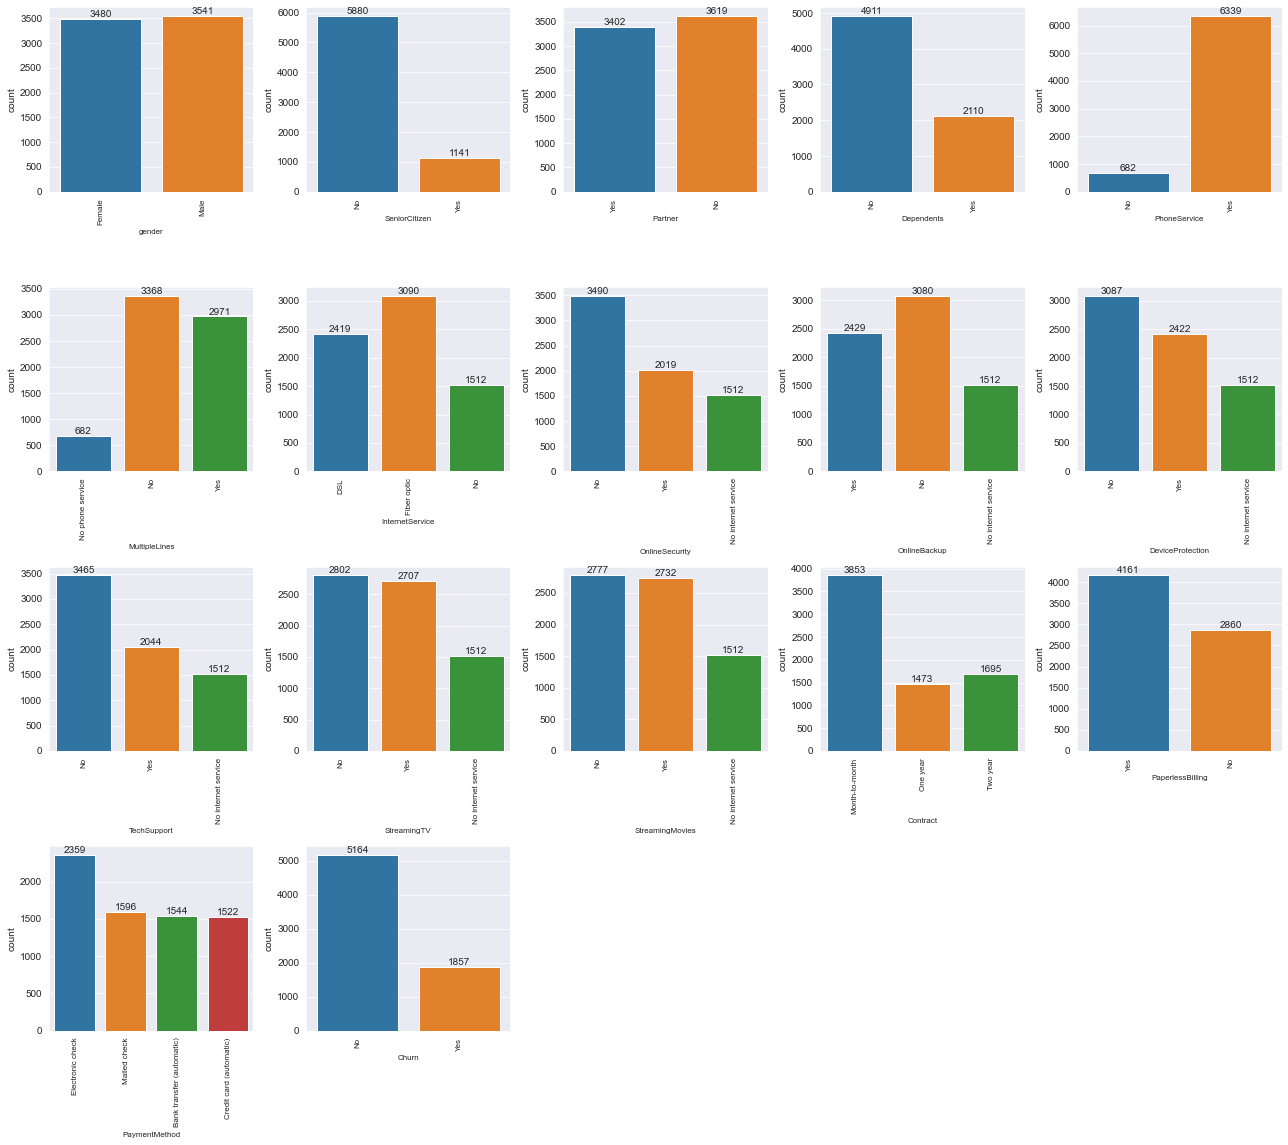

In [42]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(18,16))
for column in data1_cat.columns:
    plt.subplot(4,5,i+1)
#     ax = sns.barplot(x=column,data=data1_cat, errwidth=0)
    ax = sns.countplot(x= data1_cat[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(fontsize = 8, rotation=90)
    plt.xlabel(column,fontsize=8)
    i+=1
    
plt.tight_layout()

### Observation:
1. Male & Femal counts are same.
2. 1141 customers are of senior category.
3. 3402 customers have parteners, 3619 have no no partners.
4. 4911 customers have no dependants, 2110 have dependants
5. 90% of the customers have phone service enabled, out of these 2971 customers have multiple line of connection.
6. 34% of the customers have internet service of DSL type, 44% employees have fibre optic & remaining have no service.
7. Of all the employess with internet service, 36% have online security, 44% have online backup, 56% have device protection, 37% with tech support, 49% with TV & Movie streaming functionality.
8. About 55% customers have month to month contract, 21% have one year contract & 24% are on two year contract.
9. 59% of the customers are on paperless billing facility.
10. 33.6% of the customers pay through electronic check, 22.7% pay through mailed check, 22% pay using bank transfer facility & remaining customers pay using credit card.


<h2><font color = "blue">07. Bivariate Analysis...</font></h2>

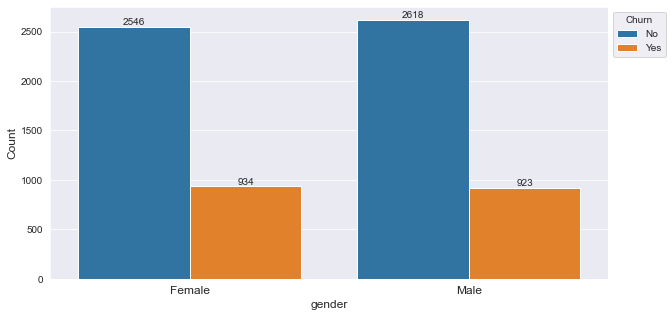

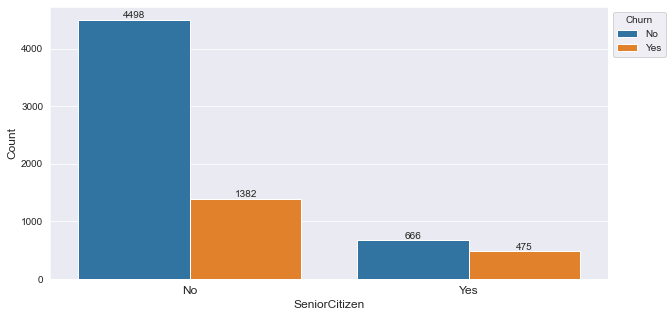

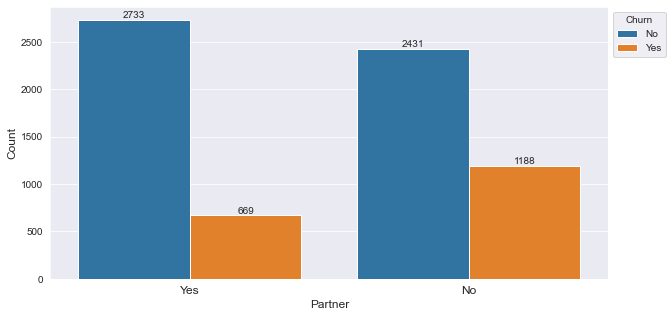

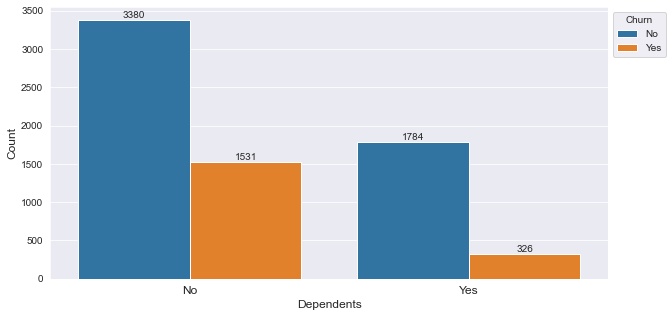

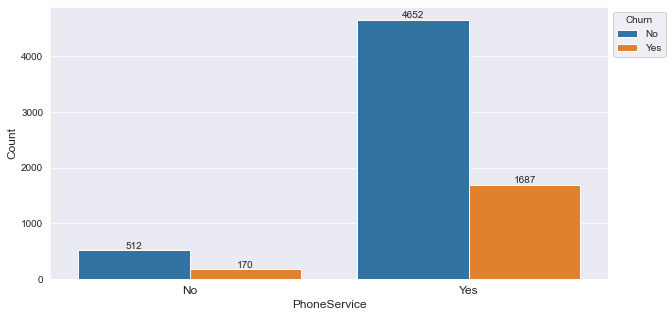

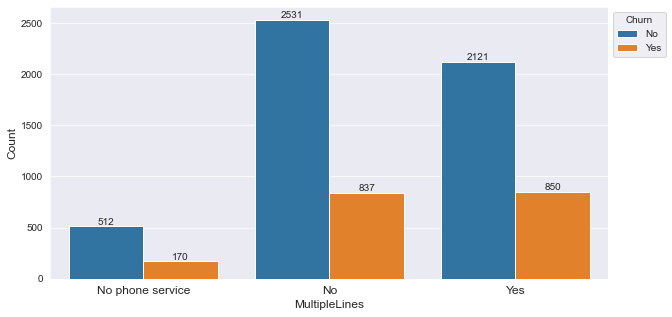

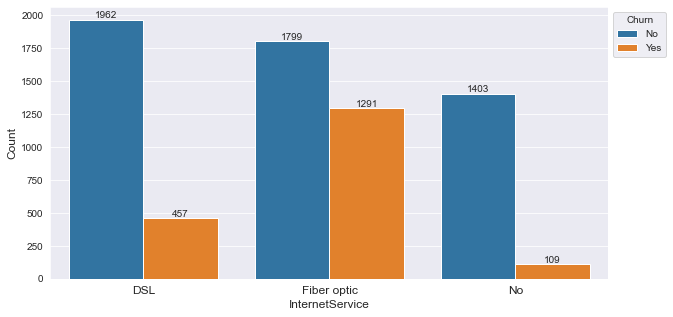

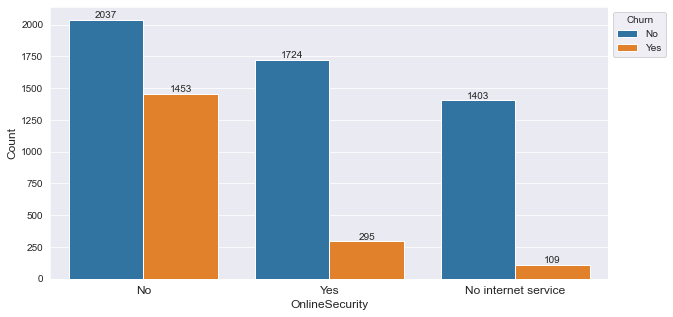

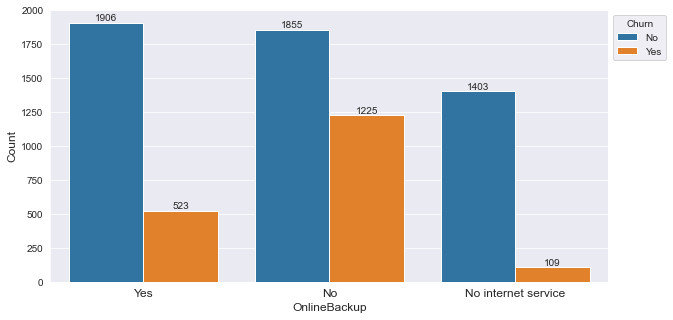

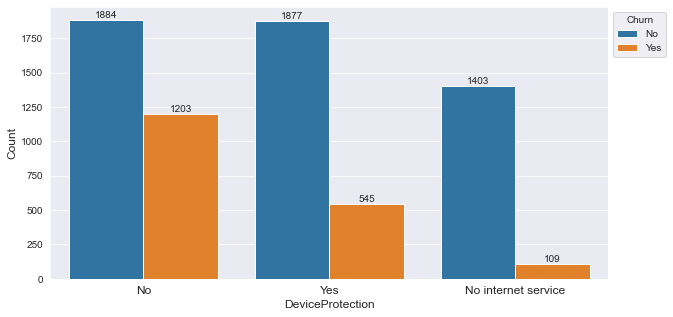

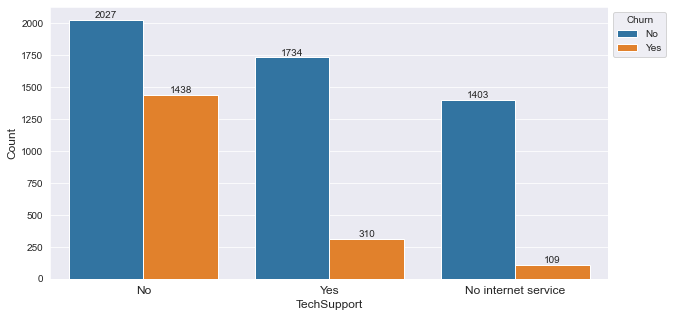

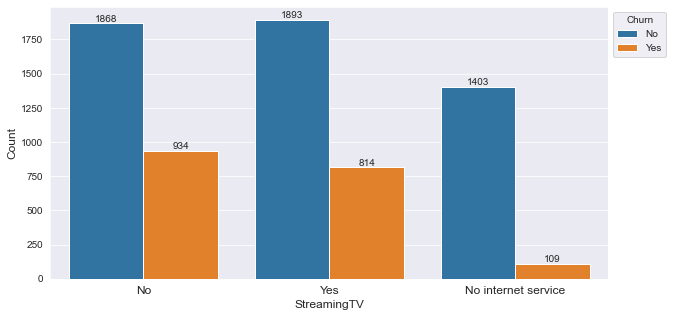

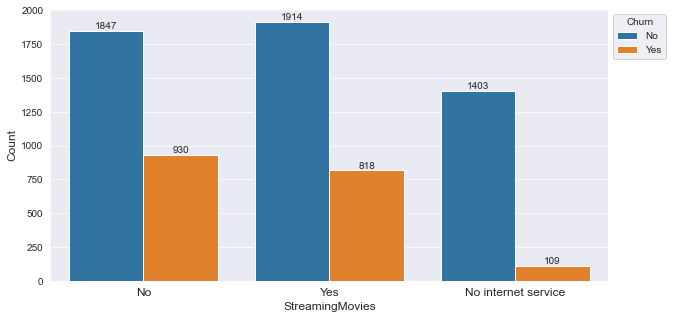

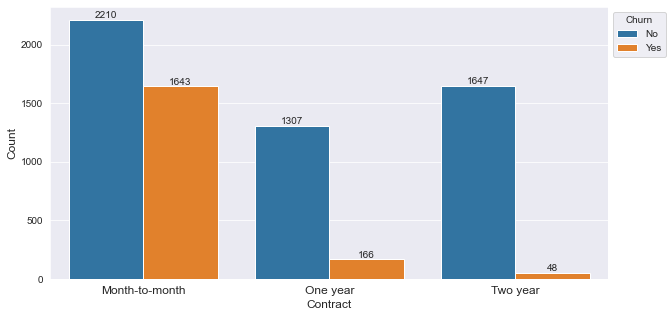

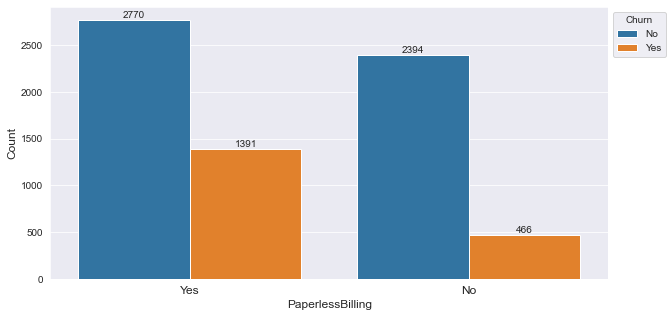

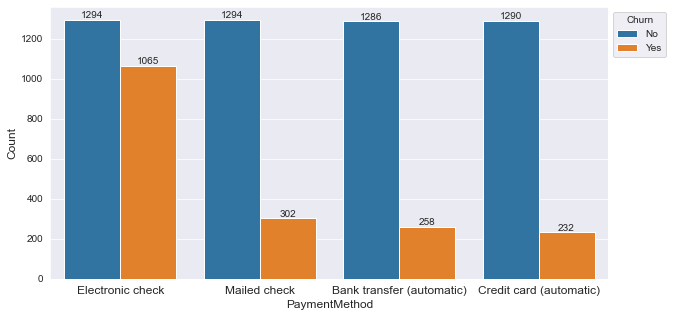

In [45]:
for item in data1_cat[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']].columns:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=item,hue='Churn',data=data1_cat)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xticks(fontsize = 12, rotation=0)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)

### Observation:
1. The probability of loosing a customer is high in the following cases:
    - Senior citizen & single living person no partner & dependants.
    - Fibre optic connection with no Online security, no online backup, no device protection, no tech support.
    - month to month contract
    - Electronic check as payment method

In [ ]:
plt1 = data1.loc[data1['region'] != 'TotalUS'].groupby('region',as_index=False)[['plu_4046','plu_4225','plu_4770']].mean()
x = plt1['region']
y_1 = plt1['plu_4046']
y_2 =plt1['plu_4225']
y_3 = plt1['plu_4770']
 
# plot bars in stack manner
plt.figure(figsize=(12,5))
plt.bar(x, y_1, color='r')
plt.bar(x, y_2, bottom=y_1, color='b')
plt.bar(x, y_3, bottom=y_1+y_2, color='y')
plt.xlabel("Regions")
plt.ylabel("Average Volume of avocados sold")
plt.xticks(fontsize = 12, rotation=90)
plt.legend(["plu_4046", "plu_4225", "plu_4770"])
plt.title("type of avocado seld in different regions")
plt.show()

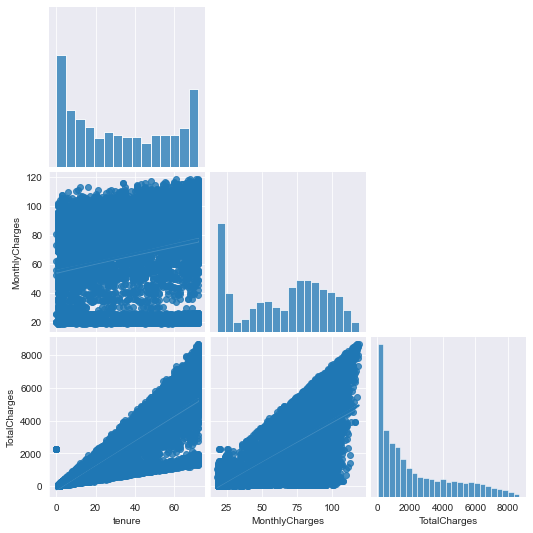

In [46]:
sns.pairplot(data1_num, kind='reg', corner=True);

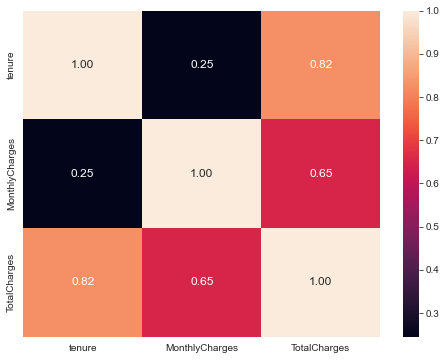

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(data1_num.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

### Observation from regplot & heatmap:
1. Month to month & Tenure has no clrear relationship.
2. Total charges & Tenure are linearly related with 82% correlation coefficient.
3. Total charges & Monthly charges are also linearly related with 65% correlation coefficient.

In [49]:
# to_csv = data3_eda.loc[:train0.index.max(), :].copy()
data1.to_csv('./Customer_Churn_Clean_Data.csv', index=False, header=True)

### From Tableau..
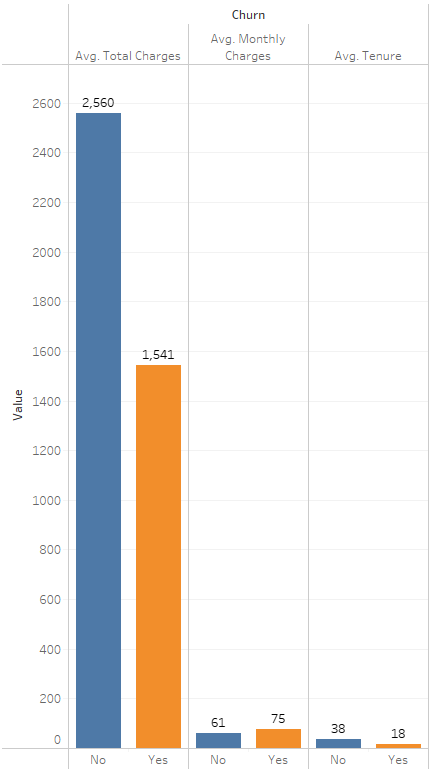

### Observation:
1. The average of total charges billed to loosing customer is 1541 dollars.. if the customer is happy with the service, the company can make 2560 dollars. It is very much important in profit aspect to give full service to retain the customer to maximize income & to be in the business.

In [50]:
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [52]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [57]:
data2 = data1.copy()

In [58]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encoding Categorical, Ordinal & nominal features

In [59]:
gender_dict = {'Male':1, 'Female':0}
srct_part_dep_ps_bill_churn_dict = {'Yes' :1, 'No':0}
mlti_line_dict = {'Yes' :1, 'No':0.5, 'No phone service':0}
int_serv_dict = {'Yes' :1, 'No':0.5, 'No internet service':0}

data2['gender'] = data2['gender'].map(gender_dict)
data2['SeniorCitizen'] = data2['SeniorCitizen'].map(srct_part_dep_ps_bill_churn_dict)
data2['Partner'] = data2['Partner'].map(srct_part_dep_ps_bill_churn_dict)
data2['Dependents'] = data2['Dependents'].map(srct_part_dep_ps_bill_churn_dict)
data2['PhoneService'] = data2['PhoneService'].map(srct_part_dep_ps_bill_churn_dict)
data2['PaperlessBilling'] = data2['PaperlessBilling'].map(srct_part_dep_ps_bill_churn_dict)
data2['Churn'] = data2['Churn'].map(srct_part_dep_ps_bill_churn_dict)
data2['MultipleLines'] = data2['MultipleLines'].map(mlti_line_dict)
data2['OnlineSecurity'] = data2['OnlineSecurity'].map(int_serv_dict)
data2['OnlineBackup'] = data2['OnlineBackup'].map(int_serv_dict)
data2['DeviceProtection'] = data2['DeviceProtection'].map(int_serv_dict)
data2['TechSupport'] = data2['TechSupport'].map(int_serv_dict)
data2['StreamingTV'] = data2['StreamingTV'].map(int_serv_dict)
data2['StreamingMovies'] = data2['StreamingMovies'].map(int_serv_dict)

In [60]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0.0,DSL,0.5,1.0,0.5,0.5,0.5,0.5,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0.5,DSL,1.0,0.5,1.0,0.5,0.5,0.5,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0.5,DSL,1.0,1.0,0.5,0.5,0.5,0.5,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0.0,DSL,1.0,0.5,1.0,1.0,0.5,0.5,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0.5,Fiber optic,0.5,0.5,0.5,0.5,0.5,0.5,Month-to-month,1,Electronic check,70.70,151.65,1


In [62]:
data3 = pd.get_dummies(data2, drop_first = True)
data3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0.5,1.0,0.5,1.0,0.5,0.5,0.5,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0.5,1.0,1.0,0.5,0.5,0.5,0.5,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0.0,1.0,0.5,1.0,1.0,0.5,0.5,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,70.70,151.65,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,1,0,1,1,24,1,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1,84.80,1990.50,0,0,0,1,0,0,0,1
7017,0,0,1,1,72,1,1.0,0.5,1.0,1.0,0.5,1.0,1.0,1,103.20,7362.90,0,1,0,1,0,1,0,0
7018,0,0,1,1,11,0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,1,29.60,346.45,0,0,0,0,0,0,1,0
7019,1,1,1,0,4,1,1.0,0.5,0.5,0.5,0.5,0.5,0.5,1,74.40,306.60,1,1,0,0,0,0,0,1


## Checking for outliers & removing..

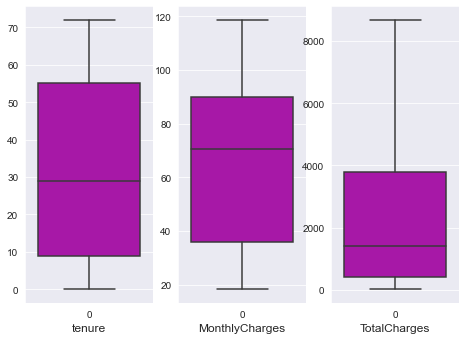

In [63]:
plt.figure(figsize=(16,12))
plotnumber=1
for col in num_cols:
    if plotnumber<=12:
        ax=plt.subplot(2,6,plotnumber)
        sns.boxplot(data2[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

##  Checking for Skewness and removing it..

In [64]:
data3[num_cols].skew()

tenure            0.235542
MonthlyCharges   -0.224097
TotalCharges      0.959088
dtype: float64

### Observation:
1. TotalCharges feature is having skewness more than the limit of +/-0.5,

In [65]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data3[num_cols])
x = pt.transform(data3[num_cols])
x = pd.DataFrame(x, columns=data3[num_cols].columns)
x.skew()

tenure           -0.243646
MonthlyCharges   -0.259855
TotalCharges     -0.143822
dtype: float64

### Observation:
After power transformation we see that, all the numerical features are within the allowed limit of skewness range (+/-0.5)

In [66]:
data4 = data3.copy()
data4[num_cols] = x
data4.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.813358,0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,1,25.143478,5.478919,0,0,0,0,0,0,1,0
1,1,0,0,0,8.779206,1,0.5,1.0,0.5,1.0,0.5,0.5,0.5,0,46.106682,22.915301,0,0,0,1,0,0,0,1
2,1,0,0,0,1.420869,1,0.5,1.0,1.0,0.5,0.5,0.5,0.5,1,43.750087,9.051328,1,0,0,0,0,0,0,1
3,1,0,0,0,10.218296,0,0.0,1.0,0.5,1.0,1.0,0.5,0.5,0,34.885005,22.737194,0,0,0,1,0,0,0,0
4,0,0,0,0,1.420869,1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,56.462160,10.209309,1,1,0,0,0,0,1,0


In [67]:
rearenge_cols = data4.columns.to_list()
rearenge_cols.remove('Churn')
rearenge_cols.append('Churn')
data5 = data4[rearenge_cols]

## Correlation & Multicollinearity Check

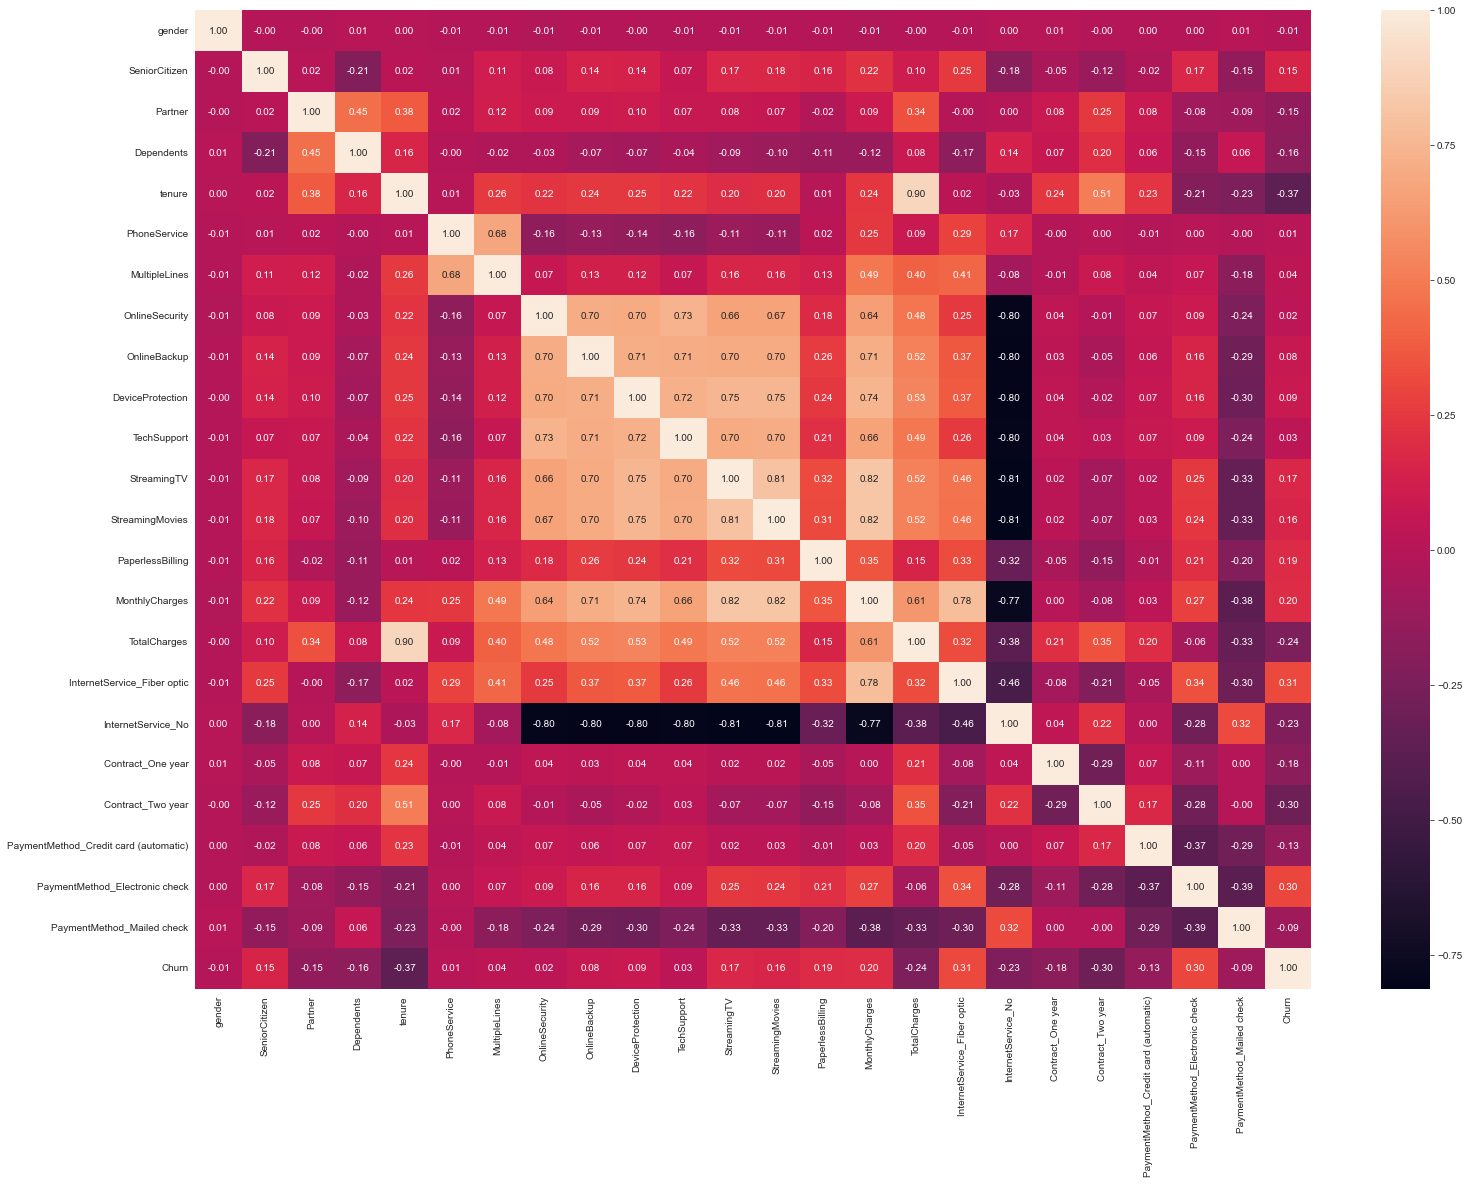

In [68]:
plt.figure(figsize=(25,18))
sns.heatmap(data5.corr(),annot=True, fmt = ".2f", annot_kws={'size':10});
plt.show()

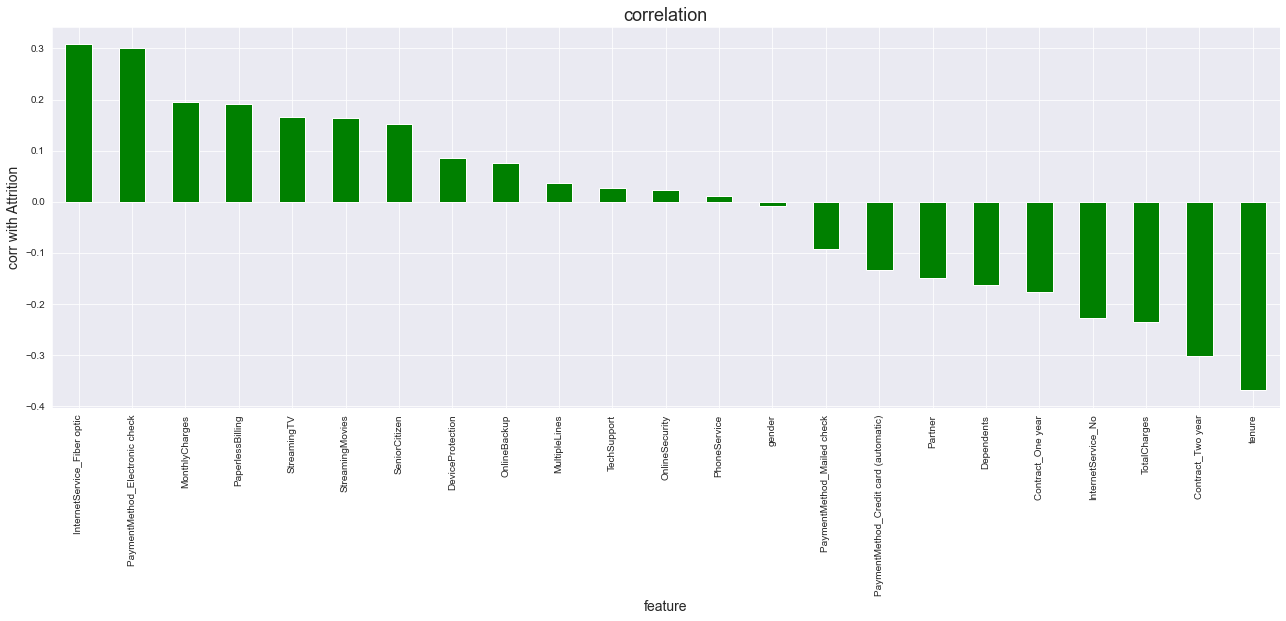

In [70]:
plt.figure(figsize = (22,7))
data5.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind = 'bar', color = 'g')
plt.xlabel('feature', fontsize=14)
plt.ylabel('corr with Attrition', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

### Observation:
1. Fiber optic as internet service, electronic check as payment method & monthly charges add to the probability of loosing a customer.
2. Gender of customer & phone service facility has no effect on loosing or retaining a customer.
3. longer the tenure, higher the chances of retaining the customer.

### Standard Scaling...

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df_feat = pd.DataFrame(scaler.fit_transform(data5.drop('Churn', axis=1)), columns = data5.drop('Churn', axis=1).columns)
df_tgt = data5['Churn']

In [74]:
x_check = df_feat[num_cols]
model = sm.OLS(df_tgt, sm.add_constant(x_check)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     759.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:04:04   Log-Likelihood:                -3228.6
No. Observations:                7021   AIC:                             6465.
Df Residuals:                    7017   BIC:                             6493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2645      0.005     57.

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x_check.columns
vif["VIF"] = [variance_inflation_factor(x_check.values, i) for i in range(x_check.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,TotalCharges,35.198948
0,tenure,23.275019
1,MonthlyCharges,7.346609


In [77]:
df_feat1 = x_check.drop(['TotalCharges'], axis=1)

vif = pd.DataFrame()
vif["variables"] = df_feat1.columns
vif["VIF"] = [variance_inflation_factor(df_feat1.values, i) for i in range(df_feat1.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,tenure,1.061797
1,MonthlyCharges,1.061797


### Observation:
1. We can see that multicollinerity is within permissible limit of 10.

In [79]:
df_feat.drop('TotalCharges', axis = 1, inplace =True)

## Dealing with Imbalenced label class

In [80]:
df_tgt.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [81]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feat, df_tgt)

In [82]:
y_class.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

## Selecting maximum features which show more than 90% of the variation in attrition label using PCA

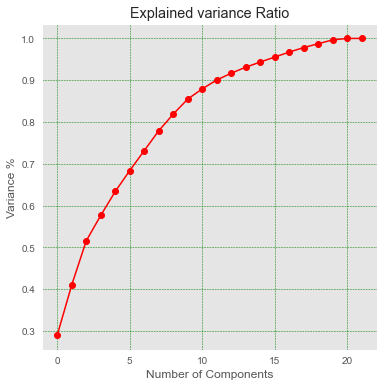

In [83]:
plt.style.use('ggplot')
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X)
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

### Observation:
1. From above graph we see 12 of the features are enough to understand the more than 90% of the variation in Attrition label.

In [84]:
x_new = PCA(n_components=21)
X = pd.DataFrame(x_new.fit_transform(X))

<h2 align="center"><font color = "red">Model Selection</font> </h2>

In [85]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [88]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()
svc = SVC(probability=True)

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Decision Tree Classifier model..
 
Best Random_state number for splitting the data is:  13
 
Accuracy score for Train : 99.86%
Accuracy score for Test : 79.32%
Confusion Matrix :

[[1045  276]
 [ 258 1003]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1321
           1       0.78      0.80      0.79      1261

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582

Cross Validation score at best cv=10 is : 78.32%


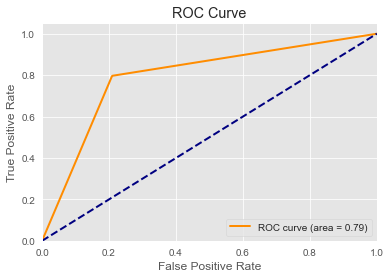

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Extra Trees Classifier model..
 
Best Random_state number for splitting the data is:  2
 
Accuracy score for Train : 99.86%
Accuracy score for Test : 86.33%
Confusion Matrix :

[[1108  191]
 [ 162 1121]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1299
           1       0.85      0.87      0.86      1283

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Cross Validation score at best cv=9 is : 86.25%


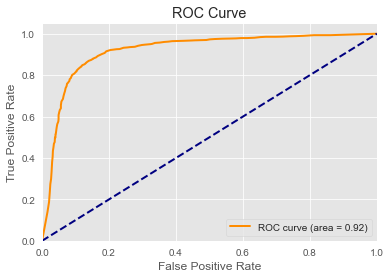

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gaussian NB Classifier model..
 
Best Random_state number for splitting the data is:  129
 
Accuracy score for Train : 77.74%
Accuracy score for Test : 77.73%
Confusion Matrix :

[[1034  264]
 [ 311  973]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.77      0.80      0.78      1298
           1       0.79      0.76      0.77      1284

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582

Cross Validation score at best cv=10 is : 77.64%


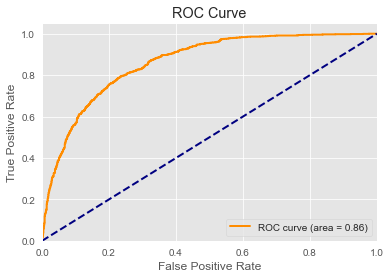

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighbors Classifier model..
 
Best Random_state number for splitting the data is:  117
 
Accuracy score for Train : 84.82%
Accuracy score for Test : 80.52%
Confusion Matrix :

[[ 871  386]
 [ 117 1208]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.88      0.69      0.78      1257
           1       0.76      0.91      0.83      1325

    accuracy                           0.81      2582
   macro avg       0.82      0.80      0.80      2582
weighted avg       0.82      0.81      0.80      2582

Cross Validation score at best cv=9 is : 79.98%


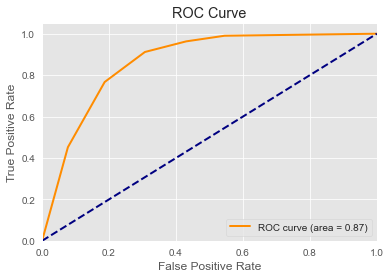

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Logistic Regression model..
 
Best Random_state number for splitting the data is:  24
 
Accuracy score for Train : 77.81%
Accuracy score for Test : 77.81%
Confusion Matrix :

[[ 919  322]
 [ 251 1090]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      1241
           1       0.77      0.81      0.79      1341

    accuracy                           0.78      2582
   macro avg       0.78      0.78      0.78      2582
weighted avg       0.78      0.78      0.78      2582

Cross Validation score at best cv=4 is : 77.50%


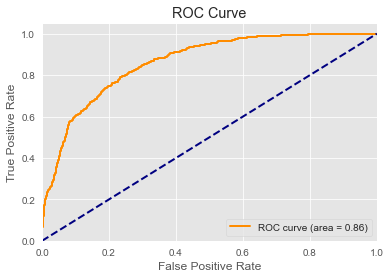

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Random Forest Classifier model..
 
Best Random_state number for splitting the data is:  75
 
Accuracy score for Train : 99.82%
Accuracy score for Test : 86.02%
Confusion Matrix :

[[1089  185]
 [ 176 1132]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1274
           1       0.86      0.87      0.86      1308

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

Cross Validation score at best cv=10 is : 85.03%


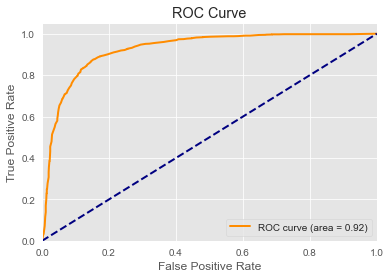

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Gradient Boosting Classifier model..
 
Best Random_state number for splitting the data is:  147
 
Accuracy score for Train : 82.43%
Accuracy score for Test : 81.53%
Confusion Matrix :

[[1010  262]
 [ 215 1095]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1272
           1       0.81      0.84      0.82      1310

    accuracy                           0.82      2582
   macro avg       0.82      0.81      0.82      2582
weighted avg       0.82      0.82      0.82      2582

Cross Validation score at best cv=6 is : 79.51%


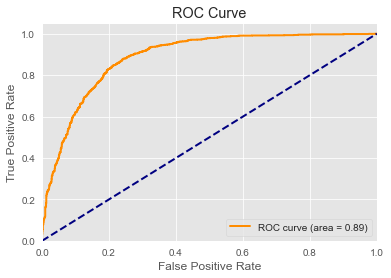

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Bagging Classifier model..
 
Best Random_state number for splitting the data is:  2
 
Accuracy score for Train : 98.93%
Accuracy score for Test : 83.38%
Confusion Matrix :

[[1100  199]
 [ 230 1053]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1299
           1       0.84      0.82      0.83      1283

    accuracy                           0.83      2582
   macro avg       0.83      0.83      0.83      2582
weighted avg       0.83      0.83      0.83      2582

Cross Validation score at best cv=9 is : 82.59%


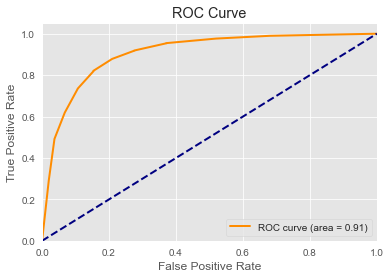

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for Support vector Classifier model..
 
Best Random_state number for splitting the data is:  147
 
Accuracy score for Train : 81.98%
Accuracy score for Test : 82.03%
Confusion Matrix :

[[1001  271]
 [ 193 1117]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1272
           1       0.80      0.85      0.83      1310

    accuracy                           0.82      2582
   macro avg       0.82      0.82      0.82      2582
weighted avg       0.82      0.82      0.82      2582

Cross Validation score at best cv=11 is : 80.58%


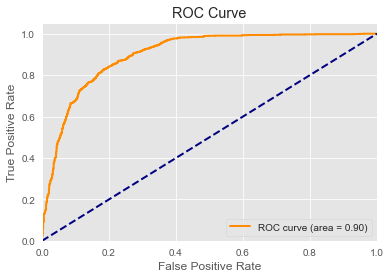

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
1,Extra Trees Classifier,2,99.86,86.33,0.03,9,86.252114
2,Gaussian NB Classifier,129,77.74,77.73,0.09,10,77.643529
4,Logistic Regression,24,77.81,77.81,0.31,4,77.498064
3,KNeighbors Classifier,117,84.82,80.52,0.54,9,79.977223
7,Bagging Classifier,2,98.93,83.38,0.64,9,82.592565
5,Random Forest Classifier,75,99.82,86.02,0.84,10,85.031621
0,Decision Tree Classifier,13,99.86,79.32,0.95,10,78.321683
8,Support vector Classifier,147,81.98,82.03,1.45,11,80.577322
6,Gradient Boosting Classifier,147,82.43,81.53,2.01,6,79.512430


In [89]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,gnb,knc,lgr,rfc,gbc,bgc,svc]
models_name = ['Decision Tree Classifier','Extra Trees Classifier','Gaussian NB Classifier','KNeighbors Classifier','Logistic Regression',
               'Random Forest Classifier','Gradient Boosting Classifier', 'Bagging Classifier', 'Support vector Classifier']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

#### Observation
We will select ExtraTreesClassifier model as it has,
1. minimum difference in Cross val & test accuracies
2. Maximum Test accuracy amongst all other classifiaction models.

<h1 align = "center"><font color = "red"><b> Hyper paramter tuning using GridSearchCV </b></font></h1>

In [90]:
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 2)

In [108]:
param_grid_etc = {'n_estimators':[400,500,600,800,900],
                  'criterion':["gini", "entropy"],
                  'max_depth':[4,5,6,7,8],
                  'min_samples_split':[3,4,5,6],
                  'min_samples_leaf':[1, 2, 3]
                 }

In [109]:
etc_grid = GridSearchCV(estimator = etc,
                       param_grid = param_grid_etc,
                       verbose = 1,
                        cv = 9,
                       scoring = 'accuracy')

In [111]:
etc_grid.fit(x_train, y_train)

Fitting 9 folds for each of 600 candidates, totalling 5400 fits


GridSearchCV(cv=9, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [400, 500, 600, 800, 900]},
             scoring='accuracy', verbose=1)

In [112]:
etc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

In [113]:
etc_grid.best_score_

0.7877588105892133

In [114]:
etc_final = ExtraTreesClassifier(criterion='gini',
                                 max_depth=8,
                                 min_samples_leaf=1,
                                 min_samples_split=4,
                                 n_estimators= 400)

In [115]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.7927962819519753


Confusion Matrix :

[[ 998  301]
 [ 234 1049]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      1299
           1       0.78      0.82      0.80      1283

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582

Cross Validation score at best cv = 9 is : 78.64%


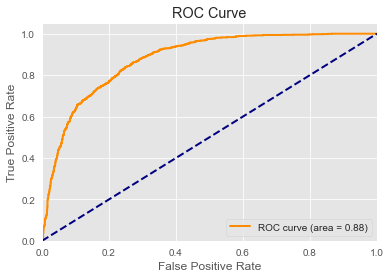

In [116]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=9, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 9 is : {cv_score*100:.2f}%")
y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

# Observation:
## After Hyperparameter tuning using Gridsearch CV the model accuracy & cross validation score is decreased. hence it is better to go with default parameters of ExtraTreesClassifier for better accuracy.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [117]:
filename='Customer_Churn.pkl'
pickle.dump(etc,open(filename,'wb'))

In [118]:
model =pickle.load(open('Customer_Churn.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
2577,1,0
2578,0,0
2579,0,0
2580,0,1
